/Users/alecpanattoni/Documents/MissingnessFairnessAnalysis/src/data_generation.py:234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+['a', 'b', 'c', 'd'])
/Users/alecpanattoni/Documents/MissingnessFairnessAnalysis/src/data_generation.py:235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+['e', 'f', 'g', 'h'])


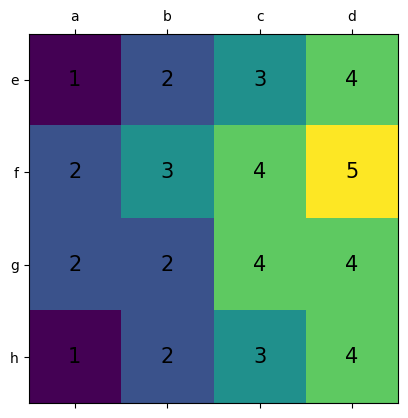

/Users/alecpanattoni/Documents/MissingnessFairnessAnalysis/src/data_generation.py:252: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+['insert', 'fairness', 'notions', 'here'])
/Users/alecpanattoni/Documents/MissingnessFairnessAnalysis/src/data_generation.py:253: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+['No Missing', 'MCAR', 'MAR', 'NMAR'])


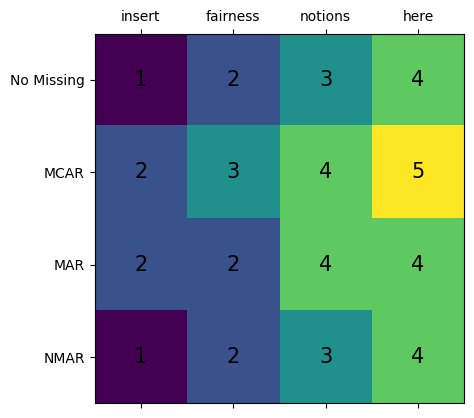

pip install 'aif360[LawSchoolGPA]'


In [1]:
import pandas as pd
import os
import sys
from src.cleaning import datacleaning
from src import data_generation
from src.preparation import model_perform
import pandas as pd
import numpy as np
import aif360
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from aif360.sklearn.metrics import statistical_parity_difference
from aif360.sklearn.metrics import average_odds_difference
from aif360.sklearn.metrics import equal_opportunity_difference

In [2]:
data = datacleaning.cleaning(os.path.join(os.path.dirname(
    os.path.realpath('run.py')) + '/data/allegations_raw.csv'))

In [3]:
target = sys.argv[1]

if target == "test":
    data = datacleaning.cleaning(os.path.join(os.path.dirname(
        os.path.realpath('run.py')) + '/data/test.csv'))

if target == "all":
    data = datacleaning.cleaning(os.path.join(os.path.dirname(
        os.path.realpath('run.py')) + '/data/allegations_raw.csv'))

In [4]:
data.isna().sum()

complainant_age_incident    0
allegation                  0
contact_reason              0
substantiated               0
complainant_gender          0
dtype: int64

In [5]:
data.head()

,complainant_age_incident,allegation,contact_reason,substantiated,complainant_gender
0,38.0,Failure to provide RTKA card,Report-domestic dispute,True,Female
1,26.0,Action,Moving violation,True,Male
2,26.0,Race,Moving violation,True,Male
3,45.0,Question,PD suspected C/V of violation/crime - street,True,Male
5,31.0,Refusal to process civilian complaint,C/V telephoned PCT,True,Male


In [6]:
train, test = train_test_split(data, train_size=0.8)

## Missingness Creation

We want the attribute with missingness to have around the same proportion of missingness for each type. This is because we don't want the amount of missingness to be a confounding factor in our results.

In [7]:
t = train.copy()
mcar = data_generation.mcar(t, 'substantiated')

/Users/alecpanattoni/Documents/MissingnessFairnessAnalysis/src/data_generation.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column].iloc[i] = np.nan


In [8]:
mcar['substantiated'].isna().sum() / mcar.shape[0]

0.19679724722075173

In [9]:
mcar = mcar.dropna(subset = 'substantiated')

In [10]:
t = train.copy()
mar = data_generation.mar(t, 'substantiated', 'complainant_gender', 0.3)

/Users/alecpanattoni/Documents/MissingnessFairnessAnalysis/src/data_generation.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[miss_column].iloc[i] = np.nan


In [11]:
mar['substantiated'].isna().sum() / mar.shape[0]

0.04954120345862008

In [12]:
mar = mar.dropna(subset = 'substantiated')

In [13]:
t = train.copy()
nmar = data_generation.nmar(t, 'substantiated', 0.3)

/Users/alecpanattoni/Documents/MissingnessFairnessAnalysis/src/data_generation.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column].iloc[i] = np.nan


In [14]:
nmar['substantiated'].isna().sum() / nmar.shape[0]

0.05254102699841186

In [15]:
nmar = nmar.dropna(subset = 'substantiated')

Now we will "handle" the missingness by dropping missing values.

## Applying Fairness Notions


In [16]:
cats = ["allegation", "contact_reason"]

### Calculating fairnes notions for No Missingness At All

In [17]:
#storing fairness notions for no missingness
no_missing_results = model_perform.model(train, test, cats)

2023-02-24 01:18:00.691107: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-24 01:18:00.691138: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Metal device set to: Apple M2


2023-02-24 01:18:00.908947: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2023-02-24 01:18:00.913132: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-24 01:18:00.913770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-24 01:18:00.993448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-24 01:18:00.996175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


epoch 0; iter: 0; batch classifier loss: 0.738058; batch adversarial loss: 0.676116
epoch 1; iter: 0; batch classifier loss: 0.518732; batch adversarial loss: 0.632914
epoch 2; iter: 0; batch classifier loss: 0.608364; batch adversarial loss: 0.574368
epoch 3; iter: 0; batch classifier loss: 0.520097; batch adversarial loss: 0.602216
epoch 4; iter: 0; batch classifier loss: 0.605512; batch adversarial loss: 0.572734
epoch 5; iter: 0; batch classifier loss: 0.506037; batch adversarial loss: 0.504726
epoch 6; iter: 0; batch classifier loss: 0.535964; batch adversarial loss: 0.474267
epoch 7; iter: 0; batch classifier loss: 0.504686; batch adversarial loss: 0.443390
epoch 8; iter: 0; batch classifier loss: 0.598138; batch adversarial loss: 0.477108
epoch 9; iter: 0; batch classifier loss: 0.570194; batch adversarial loss: 0.435750
epoch 10; iter: 0; batch classifier loss: 0.503955; batch adversarial loss: 0.473711
epoch 11; iter: 0; batch classifier loss: 0.530801; batch adversarial loss:

2023-02-24 01:19:11.237552: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Fairness notions for NMAR

In [18]:
nmar_results = model_perform.model(nmar, test, cats)

2023-02-24 01:19:11.520015: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-24 01:19:11.520036: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-02-24 01:19:11.672752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-24 01:19:11.704786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-24 01:19:11.708155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


epoch 0; iter: 0; batch classifier loss: 1.073349; batch adversarial loss: 0.744163
epoch 1; iter: 0; batch classifier loss: 0.604861; batch adversarial loss: 0.652865
epoch 2; iter: 0; batch classifier loss: 0.549868; batch adversarial loss: 0.612851
epoch 3; iter: 0; batch classifier loss: 0.491959; batch adversarial loss: 0.540797
epoch 4; iter: 0; batch classifier loss: 0.478307; batch adversarial loss: 0.532687
epoch 5; iter: 0; batch classifier loss: 0.453018; batch adversarial loss: 0.535191
epoch 6; iter: 0; batch classifier loss: 0.507938; batch adversarial loss: 0.494687
epoch 7; iter: 0; batch classifier loss: 0.572831; batch adversarial loss: 0.471112
epoch 8; iter: 0; batch classifier loss: 0.471161; batch adversarial loss: 0.475266
epoch 9; iter: 0; batch classifier loss: 0.570378; batch adversarial loss: 0.533752
epoch 10; iter: 0; batch classifier loss: 0.522690; batch adversarial loss: 0.400264
epoch 11; iter: 0; batch classifier loss: 0.481665; batch adversarial loss:

2023-02-24 01:20:18.583864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Fairness notions for MCAR

In [19]:
mcar_results = model_perform.model(mcar, test, cats)

2023-02-24 01:20:18.873720: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-24 01:20:18.873746: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-02-24 01:20:19.041724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-24 01:20:19.078387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-24 01:20:19.084760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


epoch 0; iter: 0; batch classifier loss: 1.386347; batch adversarial loss: 0.515557
epoch 1; iter: 0; batch classifier loss: 0.667945; batch adversarial loss: 0.632351
epoch 2; iter: 0; batch classifier loss: 0.556716; batch adversarial loss: 0.602379
epoch 3; iter: 0; batch classifier loss: 0.517783; batch adversarial loss: 0.565041
epoch 4; iter: 0; batch classifier loss: 0.544218; batch adversarial loss: 0.523004
epoch 5; iter: 0; batch classifier loss: 0.488020; batch adversarial loss: 0.551745
epoch 6; iter: 0; batch classifier loss: 0.525878; batch adversarial loss: 0.501475
epoch 7; iter: 0; batch classifier loss: 0.549505; batch adversarial loss: 0.470960
epoch 8; iter: 0; batch classifier loss: 0.468207; batch adversarial loss: 0.399680
epoch 9; iter: 0; batch classifier loss: 0.523220; batch adversarial loss: 0.454650
epoch 10; iter: 0; batch classifier loss: 0.515112; batch adversarial loss: 0.491723
epoch 11; iter: 0; batch classifier loss: 0.446304; batch adversarial loss:

2023-02-24 01:21:13.758657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Fairness notions for MAR

In [20]:
mar_results = model_perform.model(mar, test, cats)

2023-02-24 01:21:14.033494: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-24 01:21:14.033517: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-02-24 01:21:14.186255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-24 01:21:14.218283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-24 01:21:14.220978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


epoch 0; iter: 0; batch classifier loss: 0.876562; batch adversarial loss: 0.665193
epoch 1; iter: 0; batch classifier loss: 0.579092; batch adversarial loss: 0.621790
epoch 2; iter: 0; batch classifier loss: 0.506265; batch adversarial loss: 0.603916
epoch 3; iter: 0; batch classifier loss: 0.529204; batch adversarial loss: 0.547476
epoch 4; iter: 0; batch classifier loss: 0.504780; batch adversarial loss: 0.512635
epoch 5; iter: 0; batch classifier loss: 0.571461; batch adversarial loss: 0.462503
epoch 6; iter: 0; batch classifier loss: 0.617974; batch adversarial loss: 0.437772
epoch 7; iter: 0; batch classifier loss: 0.487067; batch adversarial loss: 0.523560
epoch 8; iter: 0; batch classifier loss: 0.572347; batch adversarial loss: 0.378935
epoch 9; iter: 0; batch classifier loss: 0.517873; batch adversarial loss: 0.443924
epoch 10; iter: 0; batch classifier loss: 0.500347; batch adversarial loss: 0.436019
epoch 11; iter: 0; batch classifier loss: 0.467720; batch adversarial loss:

2023-02-24 01:22:20.144039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Visualizing Our Results

In [ ]:
#put our fairness statistics into arrays for future usage
acc = [no_missing_results[0],nmar_results[0],mcar_results[0],mar_results[0]]
par= [no_missing_results[1],nmar_results[1],mcar_results[1],mar_results[1]]
odds= [no_missing_results[2],nmar_results[2],mcar_results[2],mar_results[2]]
opp = [no_missing_results[3],nmar_results[3],mcar_results[3],mar_results[3]]

In [23]:
labels = ['No Missingess,', 'NMAR', 'MCAR', 'MAR']

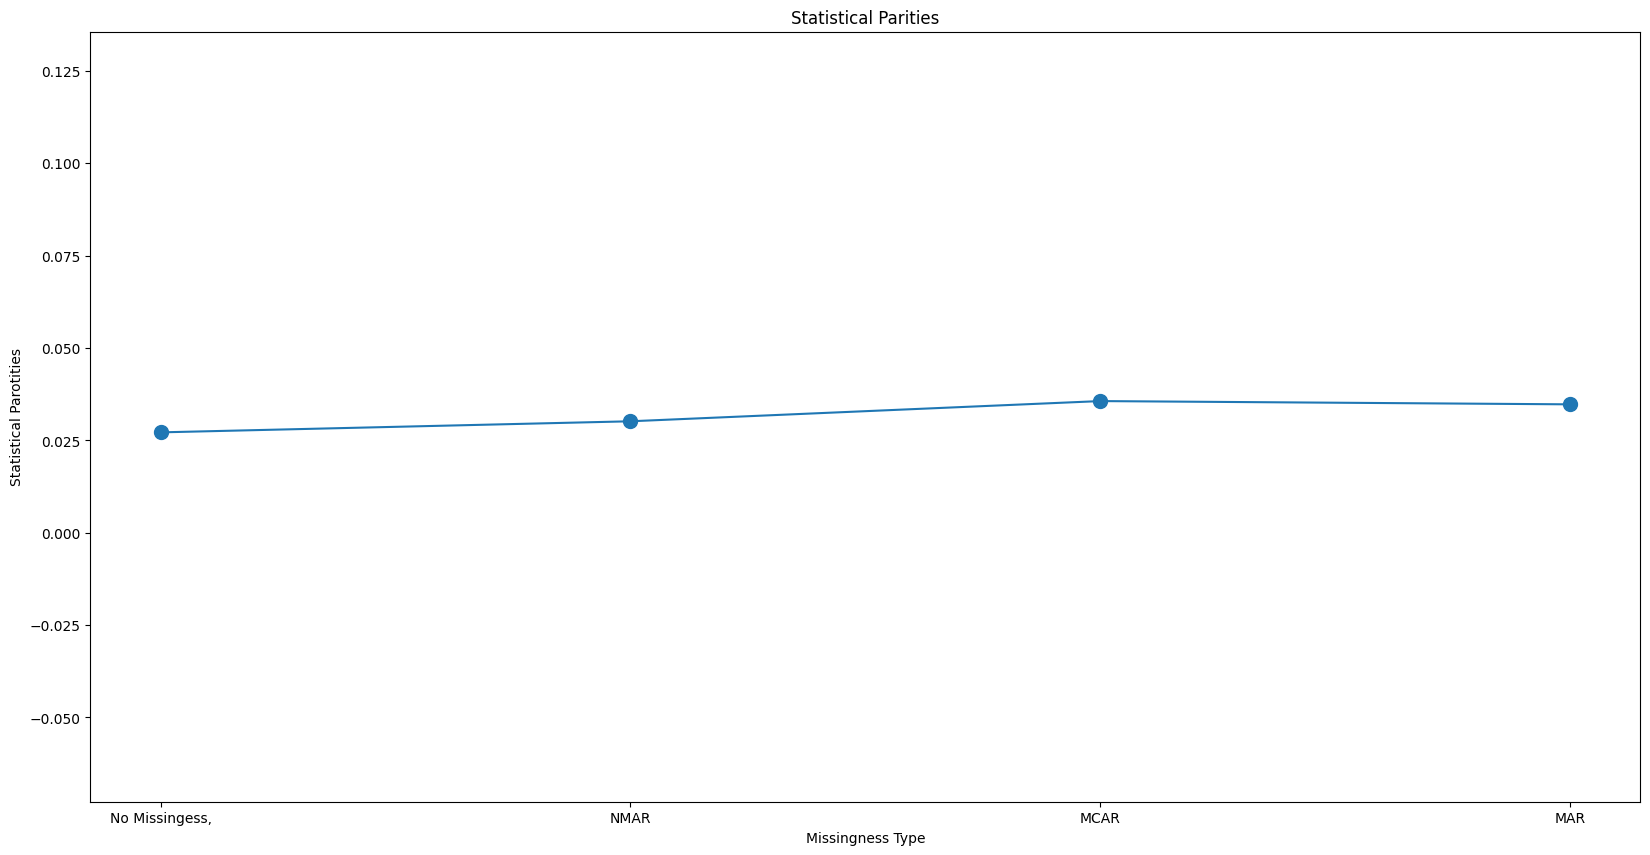

In [24]:
plt.figure(figsize = (20, 10))
plt.title('Statistical Parities')
plt.xlabel('Missingness Type')
plt.ylabel('Statistical Parotities')
plt.ylim(min(par) - 0.1, max(par) + 0.1)
plt.plot(labels, par, marker='.', markersize = 20)

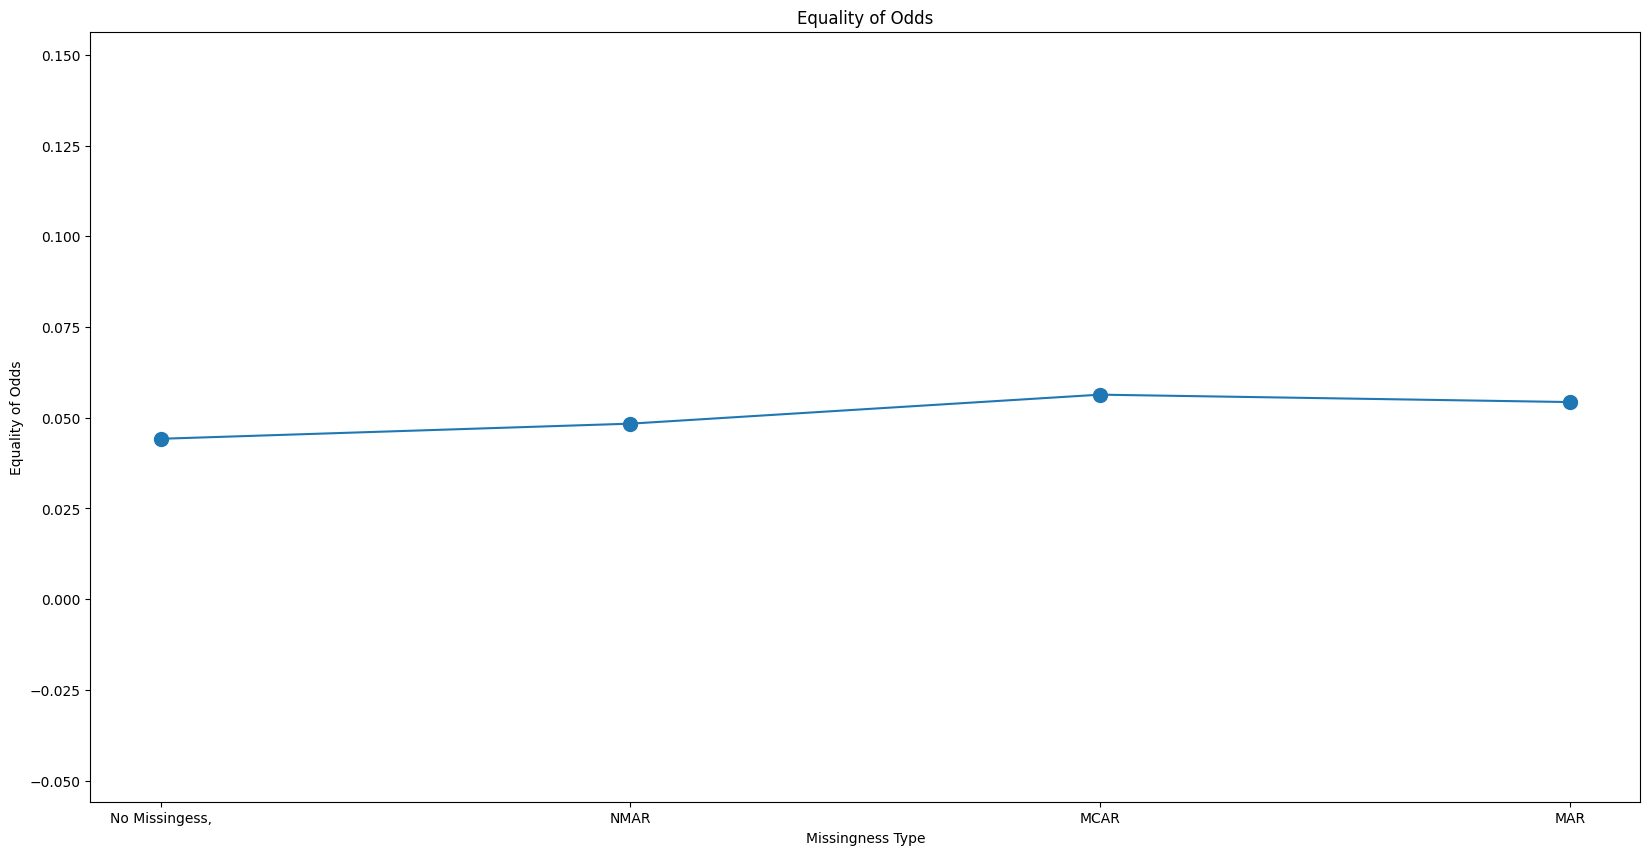

In [25]:
plt.figure(figsize = (20, 10))
plt.title('Equality of Odds')
plt.xlabel('Missingness Type')
plt.ylabel('Equality of Odds')
plt.ylim(min(odds)-0.1,max(odds) + 0.1)
plt.plot(labels, odds, marker='.', markersize = 20)

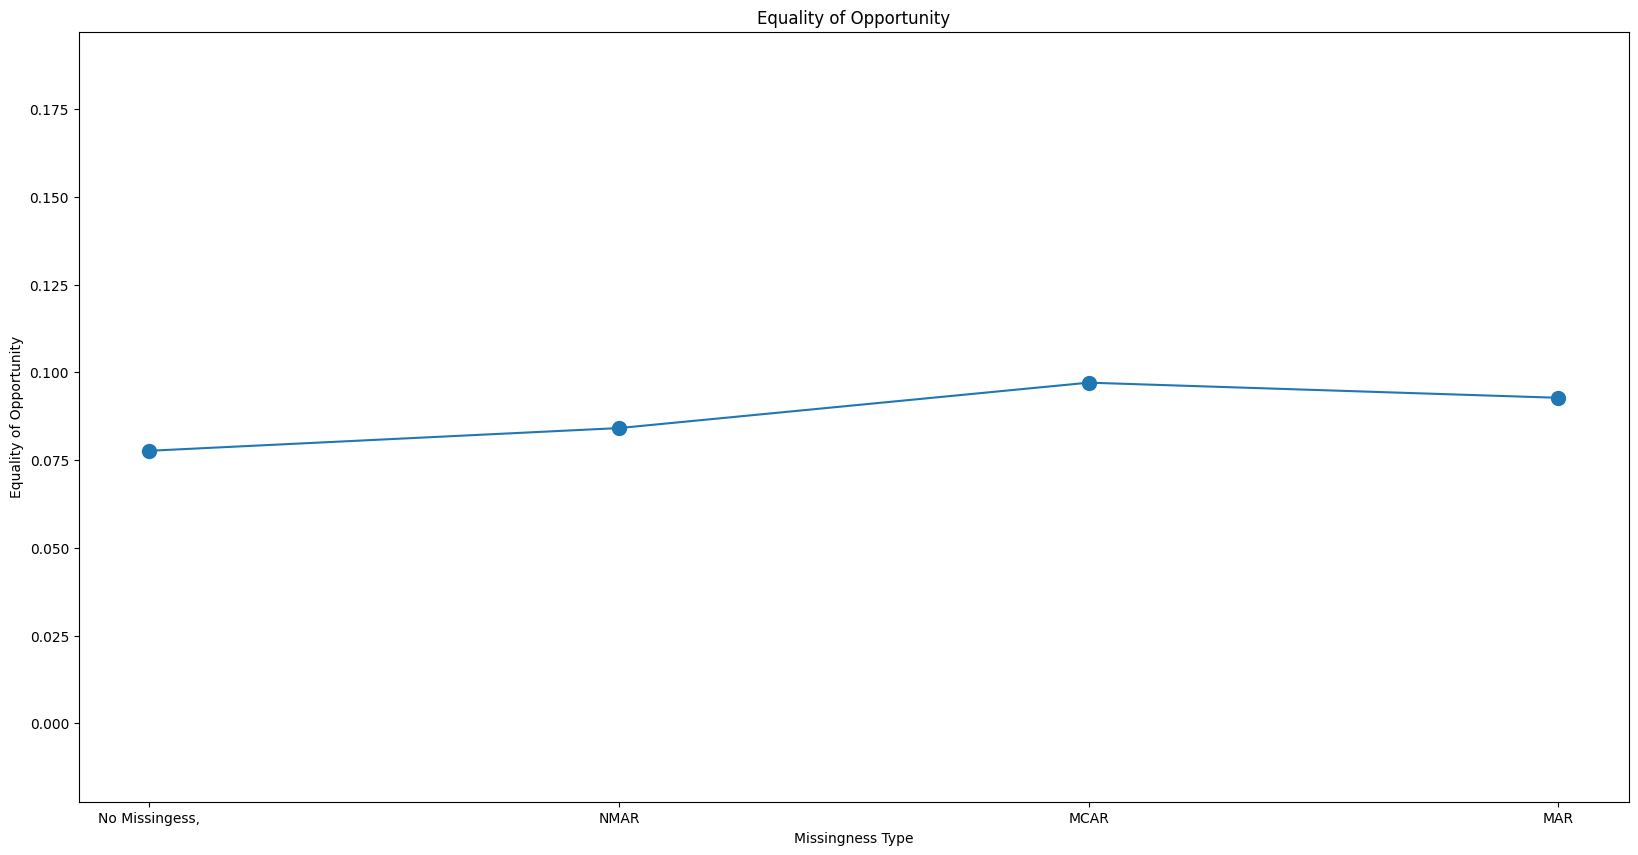

In [26]:
plt.figure(figsize = (20, 10))
plt.title('Equality of Opportunity')
plt.xlabel('Missingness Type')
plt.ylabel('Equality of Opportunity')
plt.ylim(min(opp)-0.1,max(opp) + 0.1)
plt.plot(labels, opp, marker='.', markersize = 20)

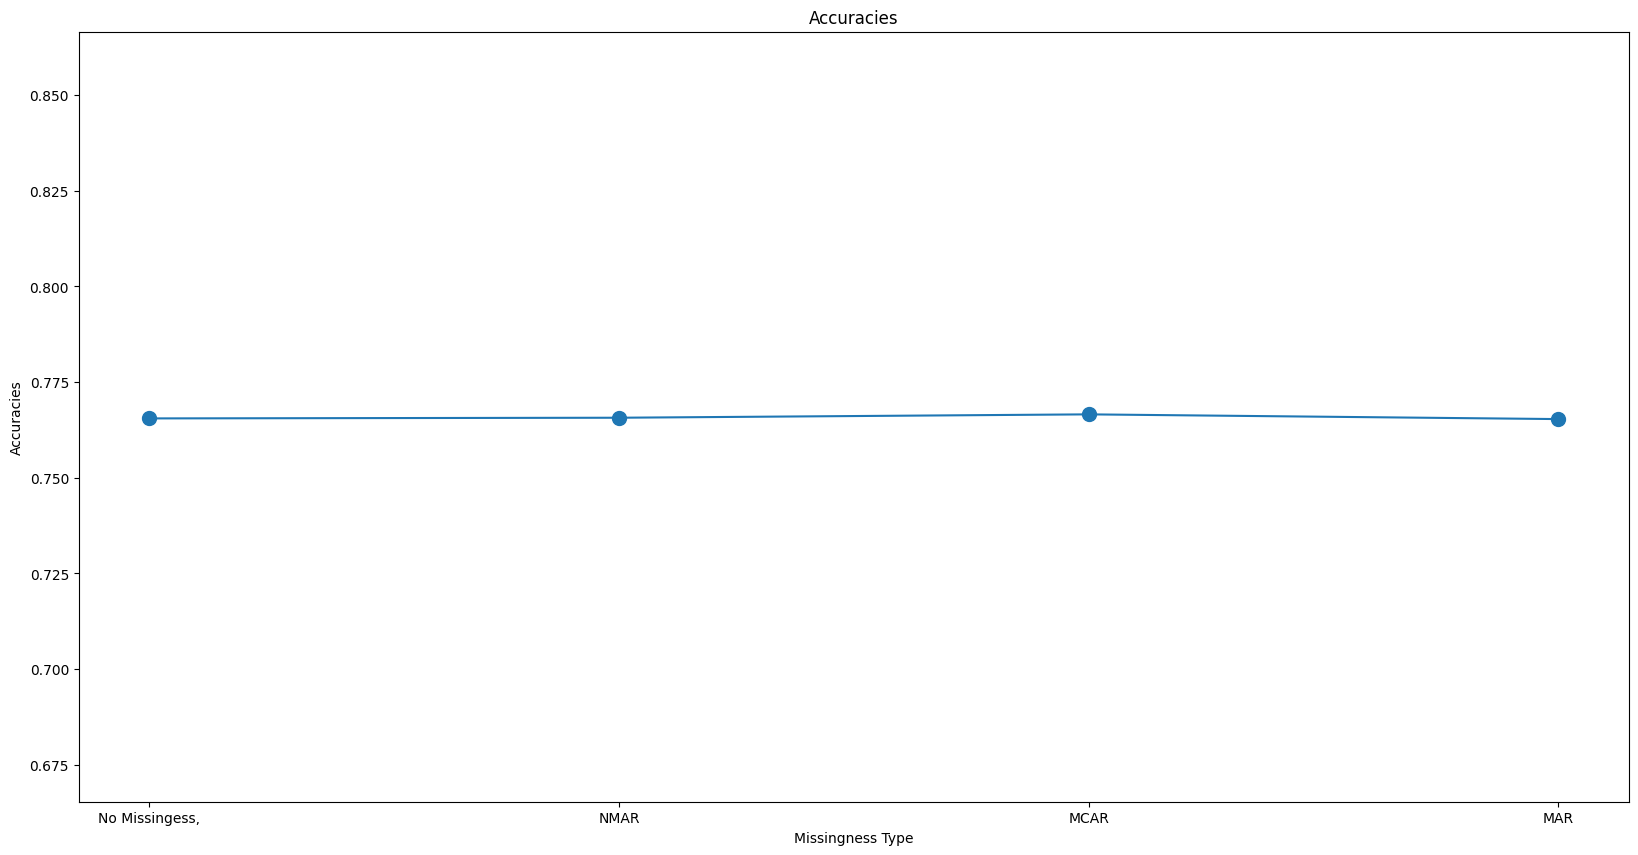

In [27]:
plt.figure(figsize = (20, 10))
plt.title('Accuracies')
plt.xlabel('Missingness Type')
plt.ylabel('Accuracies')
plt.ylim(min(acc)-0.1,max(acc) + 0.1)
plt.plot(labels, acc, marker='.', markersize = 20)